In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd '/gdrive/My Drive/'

/gdrive/My Drive


In [3]:
cd 'Colab Notebooks'

/gdrive/My Drive/Colab Notebooks


In [4]:
cd 'Customer_Personality_Analysis_Task'

/gdrive/My Drive/Colab Notebooks/Customer_Personality_Analysis_Task


# **TASK-1** 

Build a unsupervised algorithm to cluster customer data (recommended: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) . Write a short text of what is the key business takeaway of the recommendation.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

**Load Dataset**

In [6]:
dataset = pd.read_csv('marketing_campaign.csv',sep='\t',engine='python')

In [7]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Select Input Features and Target Features**

In [8]:
X = dataset[['Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain','Z_CostContact','Z_Revenue']]
y = dataset['Response']

In [9]:
X.head()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11
1,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11
2,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11
3,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11
4,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11


In [10]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

**Check Null values for input Feature**

In [11]:
X.isnull().sum()

Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
dtype: int64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Kidhome              2240 non-null   int64
 1   Teenhome             2240 non-null   int64
 2   Recency              2240 non-null   int64
 3   MntWines             2240 non-null   int64
 4   MntFruits            2240 non-null   int64
 5   MntMeatProducts      2240 non-null   int64
 6   MntFishProducts      2240 non-null   int64
 7   MntSweetProducts     2240 non-null   int64
 8   MntGoldProds         2240 non-null   int64
 9   NumDealsPurchases    2240 non-null   int64
 10  NumWebPurchases      2240 non-null   int64
 11  NumCatalogPurchases  2240 non-null   int64
 12  NumStorePurchases    2240 non-null   int64
 13  NumWebVisitsMonth    2240 non-null   int64
 14  AcceptedCmp3         2240 non-null   int64
 15  AcceptedCmp4         2240 non-null   int64
 16  AcceptedCmp5         224

**Check null values for Target Feature**

In [13]:
y.isnull().sum()

0

In [14]:
y.value_counts()

0    1906
1     334
Name: Response, dtype: int64

# **KMeans Cluster Algorithm**

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
kmeans.score(X)

-158380541.71945313

In [17]:
kmeans.predict([[0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11]])

array([1], dtype=int32)

**Question**:
Write a short text of what is the key business takeaway of the recommendation.

**ANSWER**:

The Key business takeaway of recommendation is that we can analyze customer 
using features like 'Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain','Z_CostContact','Z_Revenue'.


# **TASK-2**

Build a classification model (binomial or multinomial - recommended: xgboost python implementation) on the promotion done by the company. Run SHAP analysis on the model results, and write a short text of what would be your recommendation to business for the next round of campaigns.

**Split data using train_test_split**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**XGBOOST ALGORITHM**

In [19]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[360   8]
 [ 50  30]]


0.8705357142857143

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.89 %
Standard Deviation: 1.32 %


#SHA Analysis


In [22]:
pip install shap

     |████████████████████████████████| 371 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509240 sha256=e00f431618461112a57d80a3142a629a1865b0a268bc46e4fdb6304a03d00b2f
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [23]:
import shap
explainer = shap.Explainer(classifier,X)
shap_values = explainer(X)

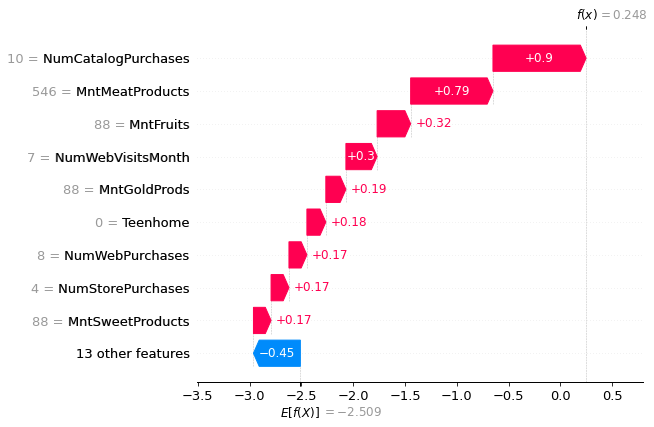

In [24]:
shap.plots.waterfall(shap_values[0])

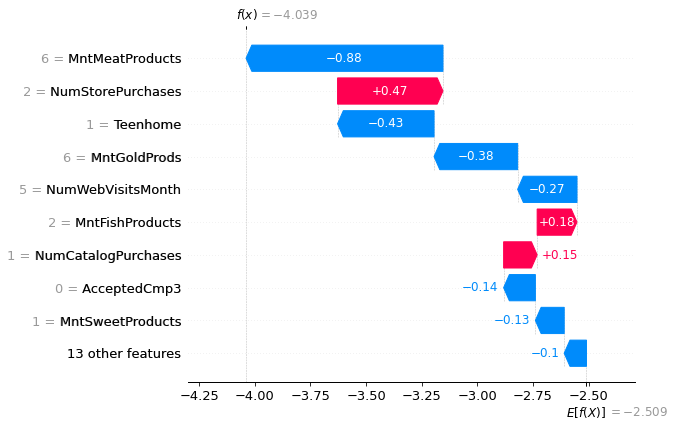

In [25]:
shap.plots.waterfall(shap_values[1])

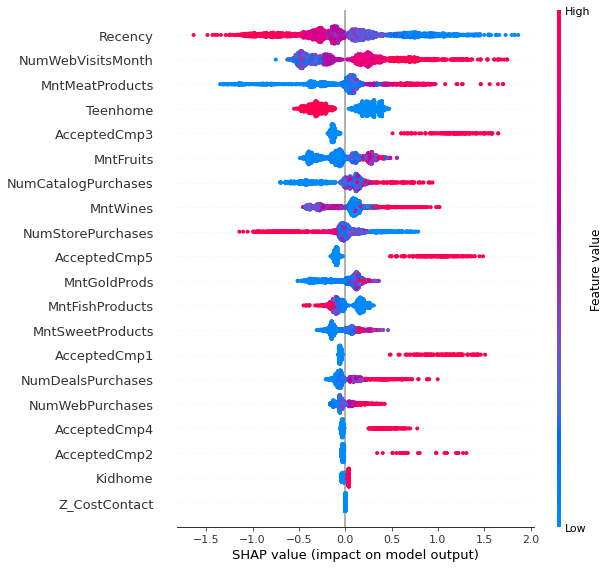

In [26]:
shap.summary_plot(shap_values, X)

**Question**:
write a short text of what would be your recommendation to business for the next round of campaigns.

**ANSWER**:
From above graph we can see that 'NumCatalogPurchases' feature is the most important feature for prediction of customer responce so for the next round of campaigns we would recommanded to business to give more importance to the feature 'NumCatalogPurchases' while creating CustomerAnalysis Model.